In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import copy
from salishsea_tools import viz_tools
import numpy as np
from matplotlib import colors
import glob 

In [3]:
# mesh mask file for land mask
meshmask = xr.open_dataset('/home/sallen/MEOPAR/grid/mesh_mask202108.nc')
tmask = meshmask.tmask[0]
tmask = tmask.rename({'z' : 'depth'})
tmask = tmask.rename({'y' : 'gridY'})
tmask = tmask.rename({'x' : 'gridX'})
area = meshmask.e1t[0] * meshmask.e2t[0]
area = area.rename({'y': 'gridY'})
area = area.rename({'x': 'gridX'})
tmask

<xarray.DataArray 'tmask' (depth: 40, gridY: 898, gridX: 398)>
[14296160 values with dtype=int8]
Dimensions without coordinates: depth, gridY, gridX

In [4]:
cm_salt = copy.copy(cm.haline)
cm_salt.set_bad('grey')
cm_bwr = copy.copy(cm.balance)
cm_bwr.set_bad('grey')
cm_temp = copy.copy(cm.thermal)
cm_temp.set_bad('grey')
cm_vel = copy.copy(cm.curl)
cm_vel.set_bad('grey')
cm_delta = copy.copy(cm.delta)
cm_delta.set_bad('grey')

In [5]:
data = xr.open_dataset('/ocean/jtao/MOAD/extractions/SalishSeaCast_wastewater_month_CO2_flux_20180101_20181231.nc')
data = data.drop(['time'])
time_values = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10','2018-11', '2018-12']
newdata = data.assign_coords(time = time_values)
newdata

<xarray.Dataset>
Dimensions:   (time: 12, gridY: 898, gridX: 398)
Coordinates:
  * gridY     (gridY) int64 0 1 2 3 4 5 6 7 ... 890 891 892 893 894 895 896 897
  * gridX     (gridX) int64 0 1 2 3 4 5 6 7 ... 390 391 392 393 394 395 396 397
  * time      (time) <U7 '2018-01' '2018-02' '2018-03' ... '2018-11' '2018-12'
Data variables:
    CO2_flux  (time, gridY, gridX) float32 ...
Attributes:
    name:         SalishSeaCast_wastewater_month_CO2_flux_20180101_20181231
    description:  Month-averaged CO2 Flux extracted from SalishSeaCast v20211...
    history:      2023-11-02 16:40 -07:00: Generated by `reshapr extract /oce...
    Conventions:  CF-1.6

In [6]:
new_CO2_flux = (newdata['CO2_flux'] * area).where(tmask.isel(depth = 0)).sum(axis = 2).sum(axis = 1) / area.where(tmask.isel(depth = 0)).sum()
new_CO2_flux

<xarray.DataArray (time: 12)>
array([-1.78675855e-04, -7.27475968e-05, -3.35423103e-06,  5.30597173e-06,
        1.82690250e-05,  1.68330257e-05,  3.77776201e-06, -1.49086260e-05,
       -3.96931479e-05, -8.51496840e-05, -1.61363684e-04, -2.62381793e-04])
Coordinates:
  * time     (time) <U7 '2018-01' '2018-02' '2018-03' ... '2018-11' '2018-12'

In [7]:
jan = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180101_20180131.nc'
feb = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180201_20180228.nc'
mar = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180301_20180331.nc'
apr = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180401_20180430.nc'
may = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180501_20180531.nc'
jun = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180601_20180630.nc'
jul = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180701_20180731.nc'
aug = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180801_20180831.nc'
sep = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20180901_20180930.nc'
octo = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20181001_20181031.nc'
nov = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20181101_20181130.nc'
dec = '/results2/SalishSea/month-avg.202111/SalishSeaCast_1m_chem_T_20181201_20181231.nc'


In [8]:
jan_file_list = glob.glob(jan)
feb_file_list = glob.glob(feb)
mar_file_list = glob.glob(mar)
apr_file_list = glob.glob(apr)
may_file_list = glob.glob(may)
jun_file_list = glob.glob(jun)
jul_file_list = glob.glob(jul)
aug_file_list = glob.glob(aug)
sep_file_list = glob.glob(sep)
octo_file_list = glob.glob(octo)
nov_file_list = glob.glob(nov)
dec_file_list = glob.glob(dec)

In [9]:
all_file_list = jan_file_list + feb_file_list + mar_file_list + apr_file_list + may_file_list + jun_file_list + jul_file_list + aug_file_list + sep_file_list + octo_file_list + nov_file_list + dec_file_list
combined_data = xr.open_mfdataset(all_file_list, data_vars=['CO2_flux'])
combined_data


<xarray.Dataset>
Dimensions:                     (time: 12, depth: 40, gridY: 898, gridX: 398)
Coordinates:
  * time                        (time) datetime64[ns] 2018-01-15T12:00:00 ......
  * depth                       (depth) float32 0.5 1.5 2.5 ... 414.5 441.5
  * gridY                       (gridY) int64 0 1 2 3 4 ... 893 894 895 896 897
  * gridX                       (gridX) int64 0 1 2 3 4 ... 393 394 395 396 397
Data variables:
    PAR                         (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    turbidity                   (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_inorganic_carbon  (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    total_alkalinity            (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_oxygen            (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    CO2_flux                    (time, gridY, gridX) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSeaCast_1m_chem_T_20180101_20180131
    description:  Month-averaged chemistry variables resampled from v202111 S...
    history:      2022-12-02 18:32 -08:00: Generated by reshapr.api.v1.extrac...
    Conventions:  CF-1.6

In [10]:
basedata = combined_data
basedata = basedata.drop(['time'])
time_values = ['2018-01', '2018-02', '2018-03', '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09', '2018-10','2018-11', '2018-12']
basedata = basedata.assign_coords(time = time_values)
basedata

<xarray.Dataset>
Dimensions:                     (depth: 40, gridY: 898, gridX: 398, time: 12)
Coordinates:
  * depth                       (depth) float32 0.5 1.5 2.5 ... 414.5 441.5
  * gridY                       (gridY) int64 0 1 2 3 4 ... 893 894 895 896 897
  * gridX                       (gridX) int64 0 1 2 3 4 ... 393 394 395 396 397
  * time                        (time) <U7 '2018-01' '2018-02' ... '2018-12'
Data variables:
    PAR                         (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    turbidity                   (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_inorganic_carbon  (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    total_alkalinity            (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    dissolved_oxygen            (time, depth, gridY, gridX) float32 dask.array<chunksize=(1, 40, 898, 398), meta=np.ndarray>
    CO2_flux                    (time, gridY, gridX) float32 dask.array<chunksize=(1, 898, 398), meta=np.ndarray>
Attributes:
    name:         SalishSeaCast_1m_chem_T_20180101_20180131
    description:  Month-averaged chemistry variables resampled from v202111 S...
    history:      2022-12-02 18:32 -08:00: Generated by reshapr.api.v1.extrac...
    Conventions:  CF-1.6

In [11]:
base_CO2_flux = (basedata['CO2_flux'] * area).where(tmask.isel(depth = 0)).sum(axis = 2).sum(axis = 1) / area.where(tmask.isel(depth = 0)).sum()
base_CO2_flux 


<xarray.DataArray (time: 12)>
dask.array<truediv, shape=(12,), dtype=float64, chunksize=(1,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) <U7 '2018-01' '2018-02' '2018-03' ... '2018-11' '2018-12'

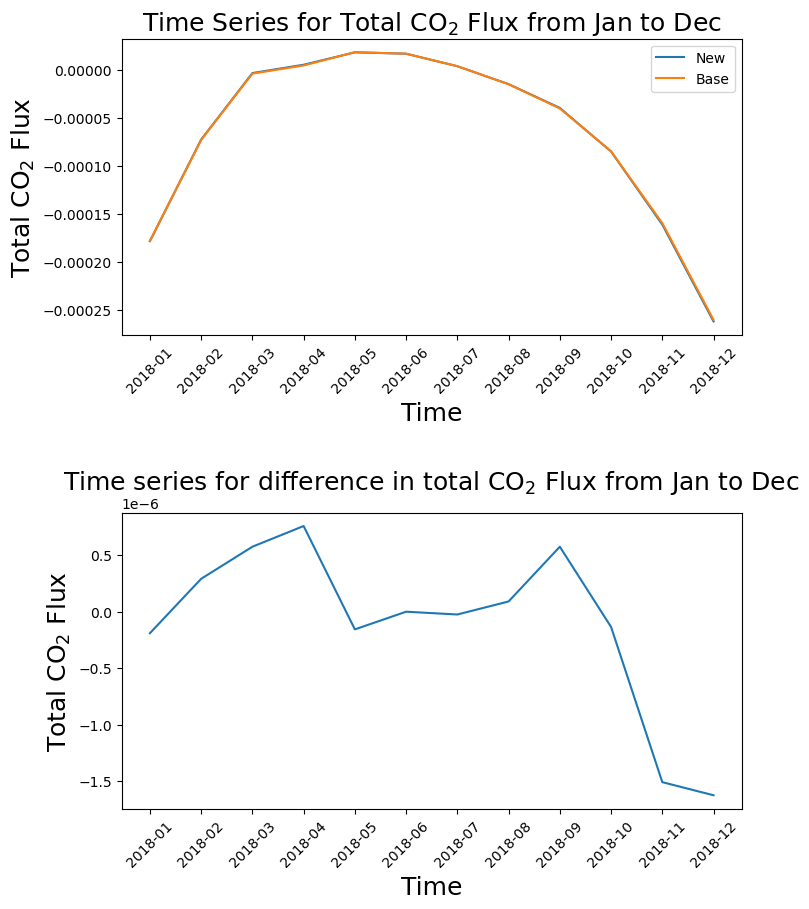

In [12]:
fig, axs = plt.subplots(2, 1, figsize=(8, 10))
new_CO2_flux.plot(ax=axs[0], x = 'time', label = "New")
base_CO2_flux.plot(ax=axs[0], x = 'time', label = "Base")
axs[0].set_title(f'Time Series for Total CO$_2$ Flux from Jan to Dec', fontsize=18)
axs[0].set_xlabel('Time', fontsize=18)
axs[0].set_ylabel('Total CO$_2$ Flux', fontsize=18)
axs[0].legend()
axs[0].tick_params(axis='x', rotation=45)

plt.subplots_adjust(hspace= 0.6) 

diff = new_CO2_flux - base_CO2_flux
diff.plot(ax=axs[1])
axs[1].set_title(f'Time series for difference in total CO$_2$ Flux from Jan to Dec', fontsize=18)
axs[1].set_xlabel('Time', fontsize=18)
axs[1].set_ylabel('Total CO$_2$ Flux', fontsize=18)
axs[1].tick_params(axis='x', rotation=45)
fig.savefig('CO2FluxTimeSeries.png', dpi=300)
